# Coursework B

Using Tensorflow and Keras to perform investigations using the MNIST dataset.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import matplotlib.style
import matplotlib as mpl

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150

#Useful for debugging problems
print(tf.__version__)


2.10.1


In [2]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train_og, y_train), (x_test_og, y_test) = mnist.load_data()

1. Write a function with the defintion def addNoiseToMNIST(yNoise,data) that adds random noise to the raw MNIST images. For each pixel in the MNIST image the function should add a (different) random noise contribution drawn from a uniform distribution from 0 to ynoise
, where ynoise
 is a configurable parameter. The function should check to ensure that no pixel has a value greater than 255 (before any scaling takes place)

In [3]:
def addNoiseToMNIST(yNoise, data):
    """
    Adds random noise to the raw MNIST images.

    Args:
    yNoise (float): The maximum value of the uniform noise distribution
    data (numpy.ndarray): The MNIST image data, where each row represents an image

    Returns:
    numpy.ndarray: The noisy MNIST image data
    """
    # Ensure yNoise is non-negative
    if yNoise < 0:
        raise ValueError("yNoise must be a non-negative value.")

    # Generate random noise for each pixel in the dataset
    noise = np.random.uniform(0, yNoise, size=data.shape)

    # Add the noise to the original data
    noisy_data = data + noise
    
    # Clip values to ensure no pixel exceeds 255
    return np.clip(noisy_data, 0, 255)

2. Plot an image from the MNIST data set with the following values of ynoise
 [0, 20, 100, 50]

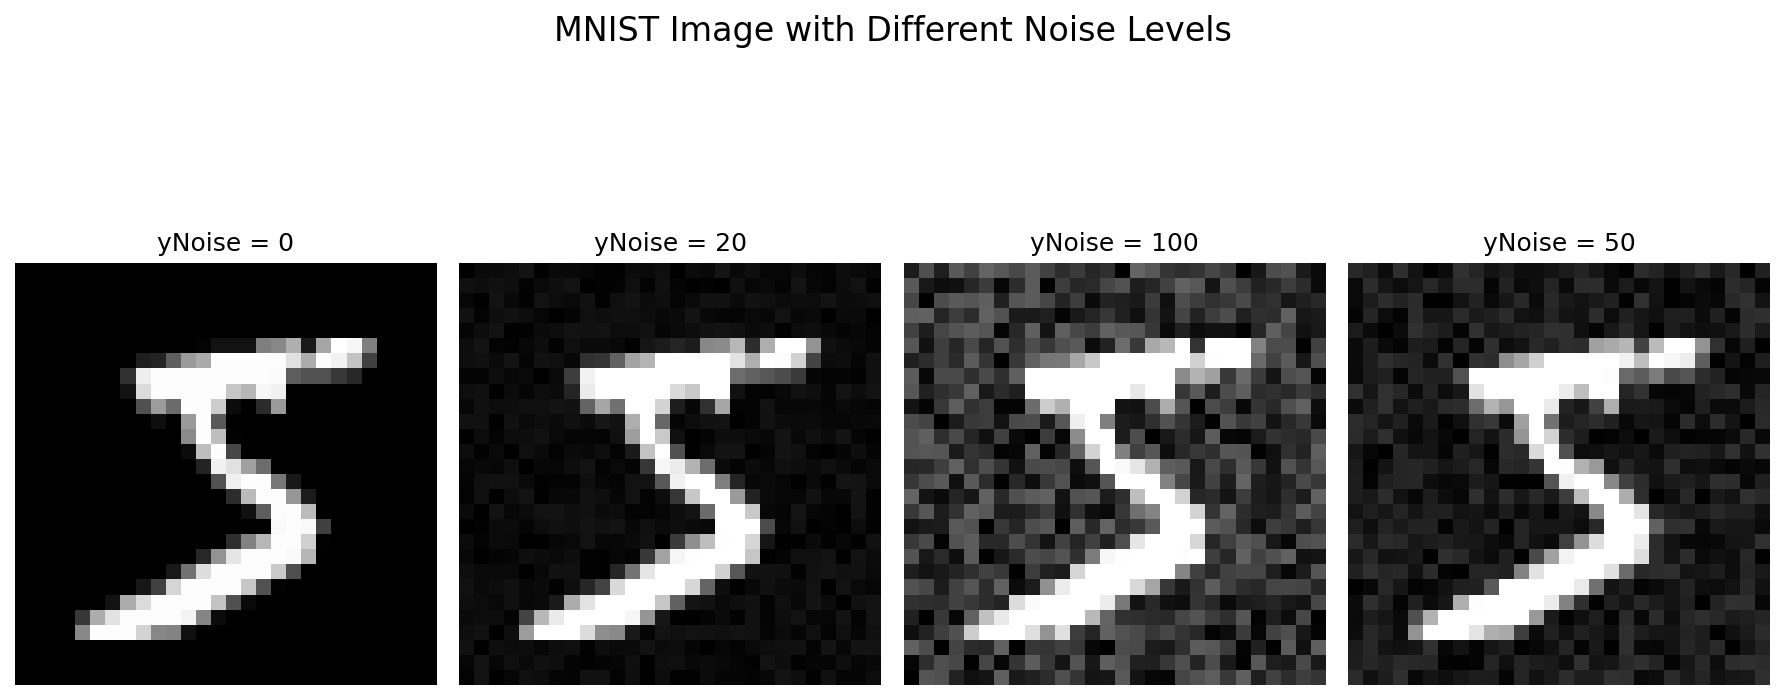

In [4]:
# Select a sample image from the dataset
idx = 0
sample_image = x_train_og[idx] # First image in the training set

# Add noise to the sample image with different yNoise values
yNoise_values = [0, 20, 100, 50]
noisy_images = [addNoiseToMNIST(yNoise, sample_image) for yNoise in yNoise_values]

# Plot the original and noisy images
plt.figure(figsize=(12, 6))

for i, (yNoise, noisy_image) in enumerate(zip(yNoise_values, noisy_images)):
    plt.subplot(1, len(yNoise_values), i + 1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'yNoise = {yNoise}')
    plt.axis('off')

plt.suptitle('MNIST Image with Different Noise Levels', fontsize=16)
plt.tight_layout()
plt.show()

3. Train a neural network to classify the images in the MNIST dataset with no noise added such that it gets acceptable performance (e.g a test accuracy of 95% or higher)

In [5]:
# Preprocess the data

# Normalize the pixel values to be between 0 and 1
x_train = x_train_og / 255
x_test = x_test_og / 255

# Reshape for CNN input as CNNs process images as 3D tensors (height, width, channels), greyscale so 1 channel
x_train = x_train.reshape((-1, 28, 28, 1)) # -1 at front to add channel dimension
x_test = x_test.reshape((-1, 28, 28, 1))

# Build the model
def buildModel():
    """
    Builds a convolutional neural network model for image classification.

    Returns:
    keras.models.Sequential: The compiled neural network model
    """
    # Define the model
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Train the model
base_model = buildModel()
base_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
_, test_acc = base_model.evaluate(x_test, y_test) # "_" is used to ignore the loss value
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/5
844/844 [==============================] - 25s 28ms/step - loss: 0.1876 - accuracy: 0.9437 - val_loss: 0.0683 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 24s 29ms/step - loss: 0.0570 - accuracy: 0.9824 - val_loss: 0.0489 - val_accuracy: 0.9863
Epoch 3/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 4/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0407 - val_accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9896
Test Accuracy: 0.9896


4. Without retraining your network use this network to make a plot of test accuracy vs  ynoise
   (so run the network repeatedly on the test dataset each time adding a differing noise contribution)

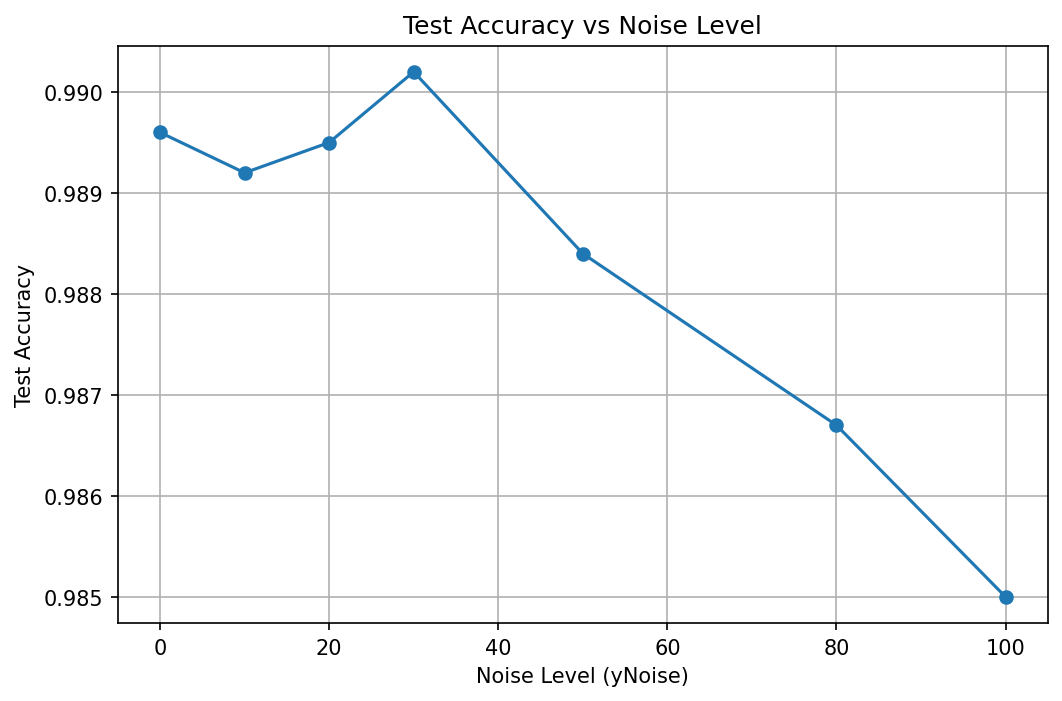

In [6]:
noise_levels = [0, 10, 20, 30, 50, 80, 100]
accuracies = []

for level in noise_levels:
    # Add noise to the test set, normalise and re-shape
    noisy_x_test = addNoiseToMNIST(level, x_test_og) / 255.0
    noisy_x_test = noisy_x_test.reshape((-1, 28, 28, 1))
    
    # Compute the accuracy of the model on the noisy test set
    _, accuracy = base_model.evaluate(noisy_x_test, y_test, verbose=0) # "_" is used to ignore the loss value
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies, marker='o')
plt.xlabel('Noise Level (yNoise)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Noise Level')
plt.grid(True)
plt.show()

5. Now retrain your neural network (starting from random weights) using the training sample but with some level of noise added to the sample and then redo task 4.  

Epoch 1/5
844/844 [==============================] - 24s 27ms/step - loss: 0.1960 - accuracy: 0.9426 - val_loss: 0.0658 - val_accuracy: 0.9817
Epoch 2/5
844/844 [==============================] - 23s 28ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0652 - val_accuracy: 0.9808
Epoch 3/5
844/844 [==============================] - 25s 29ms/step - loss: 0.0446 - accuracy: 0.9864 - val_loss: 0.0402 - val_accuracy: 0.9888
Epoch 4/5
844/844 [==============================] - 25s 29ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0367 - val_accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0312 - accuracy: 0.9890
Noise-Trained Model Accuracy (Clean Test): 0.9890


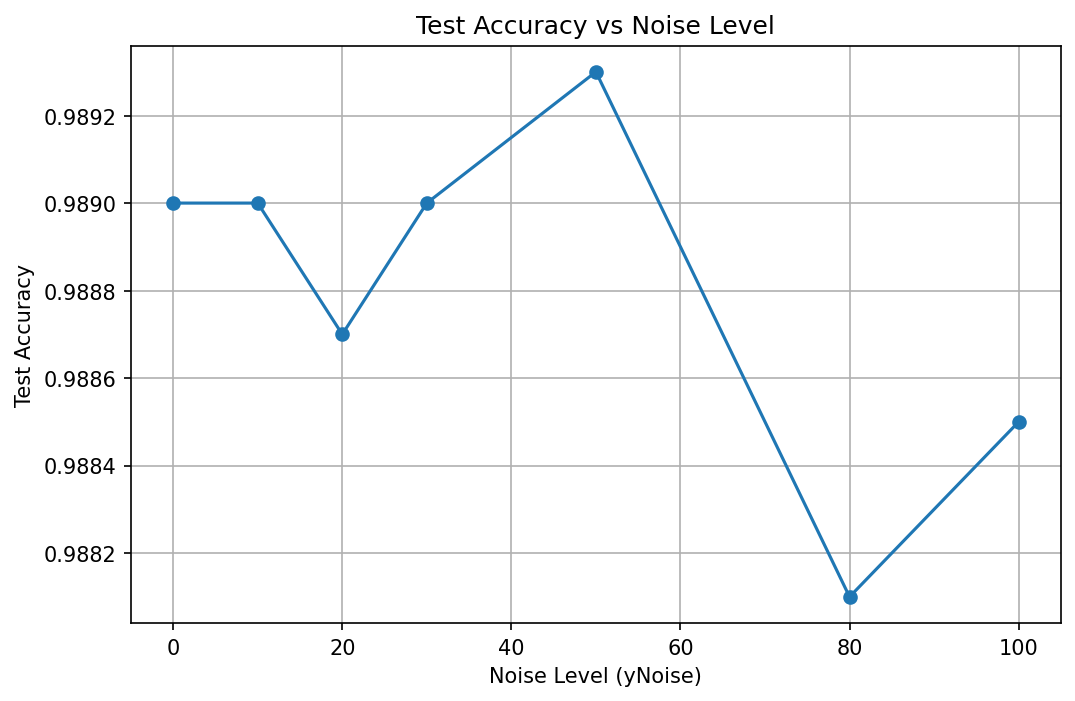

In [7]:
# Add noise to the training data
yNoise_train = 50  # Example noise level for training
noisy_x_train = addNoiseToMNIST(yNoise_train, x_train_og) / 255.0  # Normalize
noisy_x_train = noisy_x_train.reshape((-1, 28, 28, 1))

# Build and train new model
noise_trained_model = buildModel()
noise_trained_model.fit(noisy_x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate on clean test data
_, test_acc_noisy_trained = noise_trained_model.evaluate(x_test, y_test)
print(f"Noise-Trained Model Accuracy (Clean Test): {test_acc_noisy_trained:.4f}")


# Redo task 4 with the noise trained model
noise_levels = [0, 10, 20, 30, 50, 80, 100]
accuracies = []

for level in noise_levels:
    # Add noise to the test set, normalise and re-shape
    noisy_x_test = addNoiseToMNIST(level, x_test_og) / 255.0
    noisy_x_test = noisy_x_test.reshape((-1, 28, 28, 1))
    
    # Compute the accuracy of the model on the noisy test set
    _, accuracy = noise_trained_model.evaluate(noisy_x_test, y_test, verbose=0) # "_" is used to ignore the loss value
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies, marker='o')
plt.xlabel('Noise Level (yNoise)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Noise Level')
plt.grid(True)
plt.show()

6. What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?

Train Noise 0 -> Test Accuracy 0.9911
Train Noise 20 -> Test Accuracy 0.9908
Train Noise 50 -> Test Accuracy 0.9900
Train Noise 100 -> Test Accuracy 0.9893


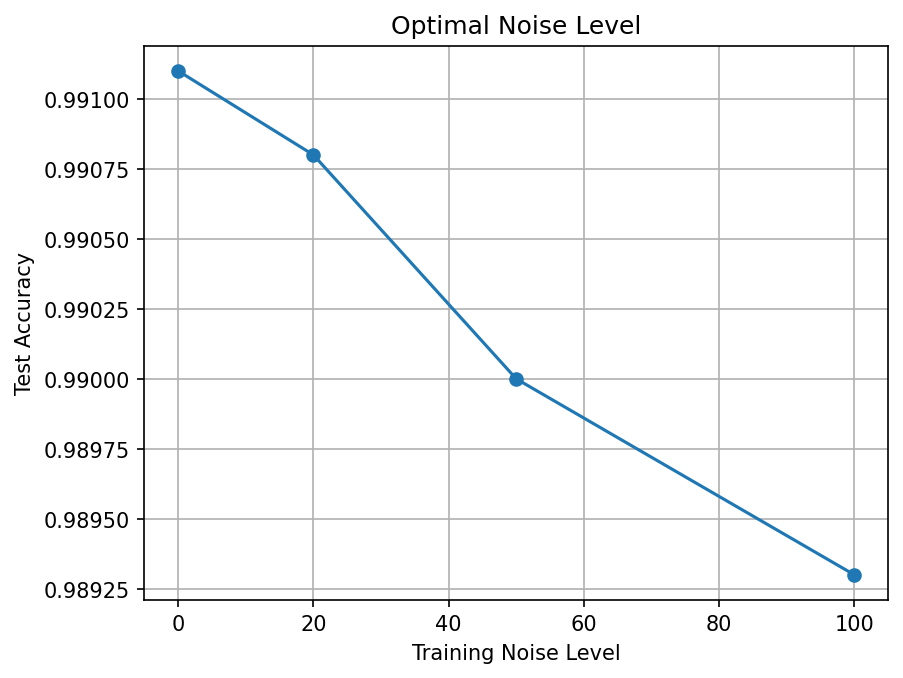

In [8]:
# Define noise levels to test during training
train_noise_levels = [0, 20, 50, 100]
results = []

for noise in train_noise_levels:
    # Generate noisy training data
    noisy_x_train = addNoiseToMNIST(noise, x_train_og) / 255.0
    noisy_x_train = noisy_x_train.reshape((-1, 28, 28, 1))

    # Train model
    model = buildModel()
    model.fit(noisy_x_train, y_train, epochs=5, batch_size=64, verbose=0)

    # Evaluate on clean test data
    _, acc = model.evaluate(x_test, y_test, verbose=0)
    results.append(acc)
    print(f"Train Noise {noise} -> Test Accuracy {acc:.4f}")

# Plot results
plt.figure()
plt.plot(train_noise_levels, results, marker='o')
plt.xlabel("Training Noise Level")
plt.ylabel("Test Accuracy")
plt.title("Optimal Noise Level")
plt.grid(True)
plt.show()

Whilst the test accuracy is greatest when there is 0 training noise, for training noise of 20 the accuracy is still high, and it will generalise much better due to it being trained on a significant amount of noise. It will thus be more robust and have a lower risk of overfitting the data compared to the model trained on no noise.